In [1]:
import os
import pandas as pd
from datetime import date
from helpers import *

# importo el archivo
csv_file="./eventos_procesados.csv"
df_original =pd.read_csv(csv_file)

# default sizes
SIZE_X=6
SIZE_Y=6

SIZE_X_PIE=10
SIZE_Y_PIE=10


df_original.head(10)
df_eventos=df_original.copy()

# Imprime el día de hoy
print(f"Fecha: {date.today()}")


Fecha: 2024-08-04


Incidentes en total: 115
Mayor cantidad de incidentes por año 35
Menor cantidad de incidentes por año 3
Promedio cantidad de incidentes por año 14.375


/home/k23dev/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


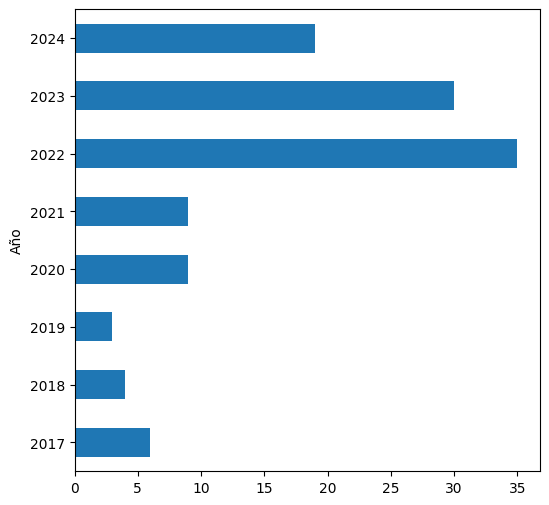

In [2]:
# graficar eventos por año
eventos_anio=df_eventos.groupby(("anio")).evento.count()
# eventos_anio.sort_values(inplace=True)
eventos_anio.plot.barh(ylabel="Año",figsize=(SIZE_X, SIZE_Y))

print(f"Incidentes en total: {eventos_anio.sum()}")

print(f"Mayor cantidad de incidentes por año {eventos_anio.max()}")
print(f"Menor cantidad de incidentes por año {eventos_anio.min()}")
print(f"Promedio cantidad de incidentes por año {eventos_anio.mean()}")

Meses con mayor cantidad de incidentes:
Mayor cantidad de incidentes por mes 15
Menor cantidad de incidentes por mes 7
Promedio cantidad de incidentes por mes 9.583333333333334


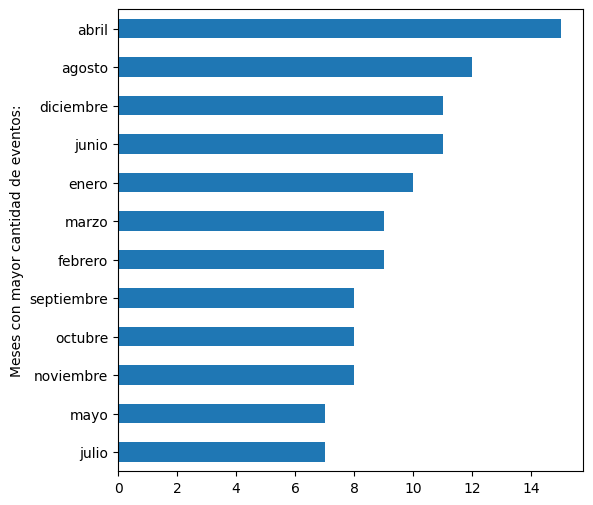

In [3]:
# graficar eventos por mes
print("Meses con mayor cantidad de incidentes:")
eventos_mes=df_eventos.groupby(("mes")).evento.count()
eventos_mes.sort_values(inplace=True)
eventos_mes.plot.barh(ylabel="Meses con mayor cantidad de eventos:",figsize=(SIZE_X, SIZE_Y))
# fig.savefig(os.path.join("/exports/meses_eventos.png"),dpi=300,format="png",bbox_inches='tight')

print(f"Mayor cantidad de incidentes por mes {eventos_mes.max()}")
print(f"Menor cantidad de incidentes por mes {eventos_mes.min()}")
print(f"Promedio cantidad de incidentes por mes {eventos_mes.mean()}")

tag
databreach         44
defacement          2
desconocido         2
dos                10
eliminación         1
fallomasivo         1
incidentes          5
intrusión           2
no-especificado     7
ransomware         54
Name: tag, dtype: int64


array([<Axes: ylabel='tipos de incidente'>], dtype=object)

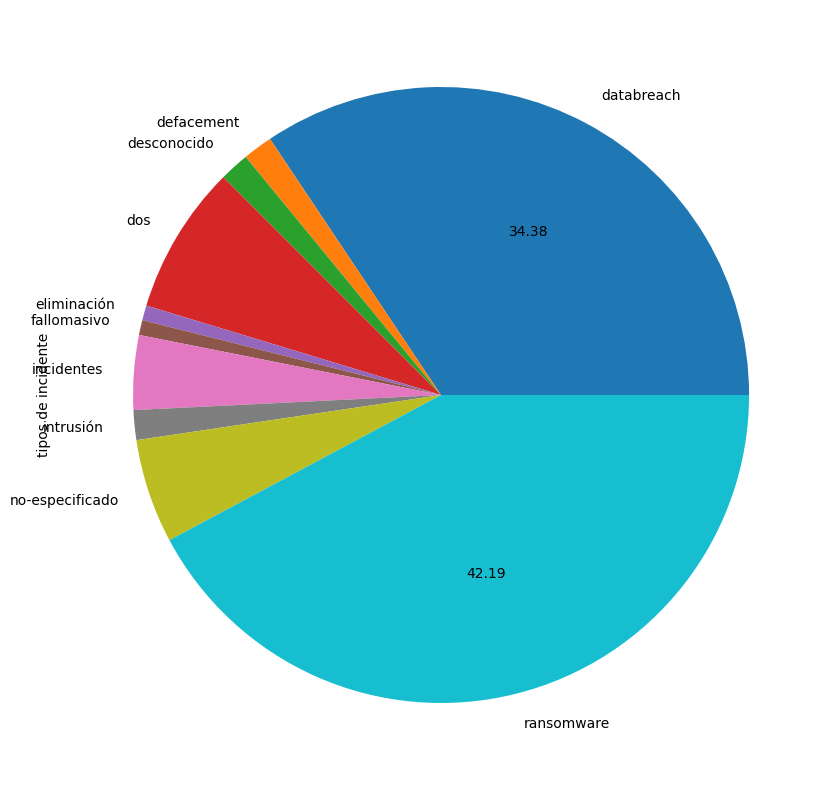

In [4]:
# En base a los tags obtengo un único tag. Cuento y grafico la cantiad de tags (tipos de incidentes diferentes) en una torta
tag_list=df_eventos["tag"].to_list()
tag_list_clean=get_tag_list_unique(tag_list)



# se convierte a un dataframe y se imprimen los resultados
df_tag=pd.Series(tag_list_clean).to_frame("tag")
df_tag_grouped=df_tag.groupby("tag").tag.count()
print(f"{df_tag_grouped}")
df_tag_grouped.plot.pie(ylabel='tipos de incidente', figsize=(SIZE_X_PIE, SIZE_Y_PIE),autopct=autopct,subplots=True)

# print(f"Mayor incidente más común {df_tag_grouped.max()}")

array([<Axes: ylabel='Tipos de ataques por evento'>], dtype=object)

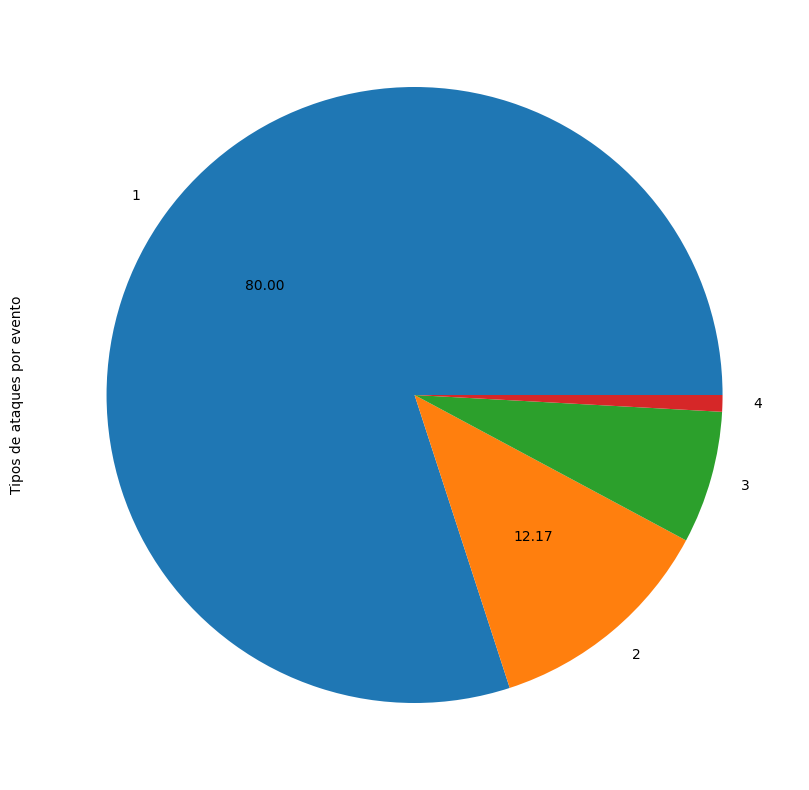

In [5]:
# Muestro cuantos enventos tienen más de un tipo de ataques. Por ejemplo cuales tienen ransomware y exfiltración
tag_list=df_eventos["tag"].to_list()
tag_list_counter=count_tag_list(tag_list)
# lo convierte en un df y imprimir
df_tags_counts=pd.Series(tag_list_counter).to_frame("tag_count")
df_tags_counts_grouped=df_tags_counts.groupby("tag_count").tag_count.count()
df_tags_counts_grouped.plot.pie(ylabel
                                ='Tipos de ataques por evento', figsize=(SIZE_X_PIE, SIZE_Y_PIE),autopct=autopct,subplots=True)

Mayor cantidad de ataques de ransomware en un año 20
Menor cantidad de ataques de ransomware en un año 1
Promedio cantidad de ataques de ransomware por año 7.714285714285714


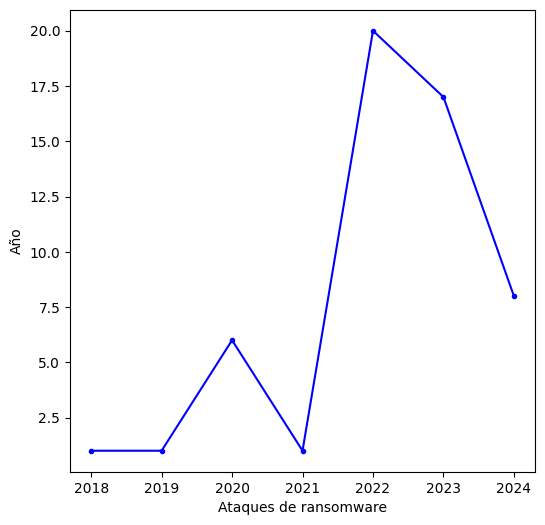

In [6]:
#filtrar por ransomware
# Tag específico por el cual quieres filtrar
tag_filtrar = 'ransomware'
# Aplicar el filtro usando apply y lambda
filtro = df_eventos[df_eventos['tag'].apply(lambda tags: tag_filtrar in tags)]
# filtro = tag_list_clean[tag_list_clean['tag'].apply(lambda tags: tag_filtrar in tags)]

# grafica de eventos de ransomware
databreach_por_anio=filtro.groupby("anio").evento.count()
# ransomware_por_anio.plot.bar()
databreach_por_anio.plot.line(stacked=True, xlabel='Ataques de ransomware', ylabel='Año',figsize=(SIZE_X, SIZE_Y),color="b",style='.-')
# plt.ylabel=("Año")

print(f"Mayor cantidad de ataques de ransomware en un año {databreach_por_anio.max()}")
print(f"Menor cantidad de ataques de ransomware en un año {databreach_por_anio.min()}")
print(f"Promedio cantidad de ataques de ransomware por año {databreach_por_anio.mean()}")

Mayor cantidad de ataques de filtración de datos en un año 10
Menor cantidad de ataques de filtración de datos en un año 2
Promedio cantidad de ataques de filtración de datos por año 5.5


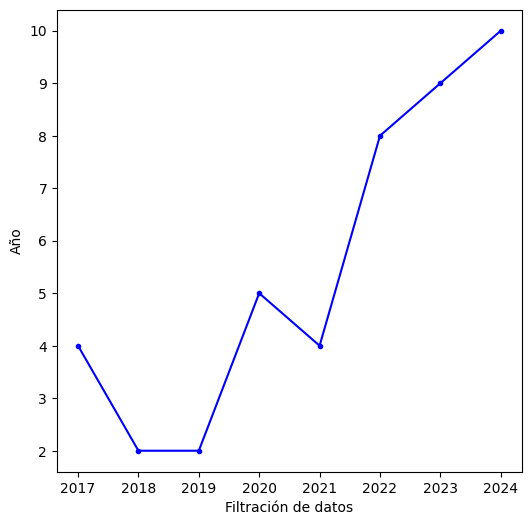

In [ ]:
#filtrar por filtraciones de datos
# Tag específico por el cual quieres filtrar
tag_filtrar = 'databreach'
# Aplicar el filtro usando apply y lambda
filtro = df_eventos[df_eventos['tag'].apply(lambda tags: tag_filtrar in tags)]

# grafica de eventos de ransomware
databreach_por_anio=filtro.groupby("anio").evento.count()
# ransomware_por_anio.plot.bar()
databreach_por_anio.plot.line(stacked=True, xlabel='Filtración de datos', ylabel='Año',figsize=(SIZE_X, SIZE_Y),color="b",style='.-')
# plt.ylabel=("Año")

print(f"Mayor cantidad de ataques de filtración de datos en un año {databreach_por_anio.max()}")
print(f"Menor cantidad de ataques de filtración de datos en un año {databreach_por_anio.min()}")
print(f"Promedio cantidad de ataques de filtración de datos por año {databreach_por_anio.mean()}")